In [1]:
import pandas as pd
import numpy as np
import warnings
from turtle import color
import statsmodels.api as sm
import os
import glob
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('data.xlsx')
data2 = pd.read_csv('Measured-filtered.csv')

In [3]:
data2.head()

,O'Clock,Circumferential/Axial (mm),0,1,2,3,4,5,6,7,...,988,989,990,991,992,993,994,995,996,997
0,12:00,0.0,8.39,8.48,8.42,8.13,8.19,8.92,9.48,8.78,...,9.1,8.39,9.42,8.92,8.89,9.01,8.89,8.86,9.25,9.07
1,NaN,1.0,8.42,8.51,8.42,8.22,8.25,8.48,NaN,8.75,...,8.57,8.86,9.16,8.89,8.98,9.01,9.01,8.92,9.42,9.54
2,NaN,2.0,8.60,8.66,8.45,8.57,8.39,8.42,8.51,8.13,...,8.3,8.78,9.22,8.98,9.01,8.98,9.01,9.04,8.81,9.72
3,NaN,3.0,8.60,7.95,8.07,8.6,8.22,8.3,8.48,8.33,...,8.48,8.89,8.92,8.86,8.92,9.01,9.01,8.84,8.78,8.69
4,NaN,4.0,7.57,8.19,7.92,8.39,8.28,8.36,8.66,8.6,...,8.42,8.6,8.95,8.75,8.95,9.22,9.16,8.84,8.98,8.45


In [12]:
# df = data.drop(['Unnamed: 0'],axis=1)
# df = df.apply(pd.to_numeric,errors='coerce')


#df2 = df2.drop(["O'Clock"],axis=1)
df = df2.apply(pd.to_numeric,errors='coerce')

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,988,989,990,991,992,993,994,995,996,997
0,8.39,8.48,8.42,8.13,8.19,8.92,9.48,8.78,NaN,7.95,...,9.10,8.39,9.42,8.92,8.89,9.01,8.89,8.86,9.25,9.07
1,8.42,8.51,8.42,8.22,8.25,8.48,NaN,8.75,8.57,8.13,...,8.57,8.86,9.16,8.89,8.98,9.01,9.01,8.92,9.42,9.54
2,8.60,8.66,8.45,8.57,8.39,8.42,8.51,8.13,NaN,8.10,...,8.30,8.78,9.22,8.98,9.01,8.98,9.01,9.04,8.81,9.72
3,8.60,7.95,8.07,8.60,8.22,8.30,8.48,8.33,8.45,8.42,...,8.48,8.89,8.92,8.86,8.92,9.01,9.01,8.84,8.78,8.69
4,7.57,8.19,7.92,8.39,8.28,8.36,8.66,8.60,8.25,8.30,...,8.42,8.60,8.95,8.75,8.95,9.22,9.16,8.84,8.98,8.45


In [14]:
df = df.fillna(0)

In [28]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Columns: 998 entries, 0 to 997
dtypes: float64(998)
memory usage: 6.6 MB


In [79]:
blocked = pd.read_csv('blocked.csv')
blocked = blocked.dropna(how='all',axis = 0)
blocked = blocked.dropna(how='all',axis = 1)
blocked = blocked.dropna(axis = 1)
columns= blocked.iloc[0,1:].values.tolist()
columns

['Start long', 'Start circ', 'End long', 'End circ']

In [81]:
blocked.head()

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
5,Feature,Start long,Start circ,End long,End circ
6,1,415,460,501,450
7,2,635,0,693,50
8,3,836,400,892,445
9,4,742,764,776,796


In [99]:
blocked = blocked.drop([5])
blocked = blocked.drop([0], axis=0)


In [100]:
blocked.columns = columns
blocked= blocked.reset_index(drop=True)
blocked

,Start long,Start circ,End long,End circ
0,635,0,693,50
1,836,400,892,445
2,742,764,776,796
3,1167,407,1242,481
4,1631,760,1696,723
5,1692,450,1917,500
6,2116,756,2189,812
7,2139,616,2176,653
8,2257,409,2359,456
9,2535,179,2577,221


In [113]:
from collections import defaultdict
block_dic = defaultdict(list)
for index, row in blocked.iterrows():
    for i in range(int(row['Start circ']),int(row['End circ'])):
      for j in range(int(row['Start long']),int(row['End long'])):
         block_dic[i].append(j)




    

    

In [114]:
for item in block_dic[45]:
    print(item)

635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570


In [128]:
final_data = df.copy()
result = list()

thresh_list = [0.75]
noise_thresh_list = [6.5]

for noise_thresh in noise_thresh_list:
    for thresh in thresh_list:
        for col in range(1,len(df.columns) - 1):
            result = list()
            x = df[str(col)].values
            x_after = df[str(col+1)].values
            x_before = df[str(col-1)].values
            for row in range(1,len(x) -1):
                 if row in block_dic:
                    if col not in block_dic[row]:
                        if (x[row]<= noise_thresh and x[row] > 0) and ((x[row]<thresh*x[row-1]) or (x[row]<thresh*x[row+1]) or (x[row]<thresh* x_after[row]) or (x[row]<thresh* x_before[row])):
                            result.append(row)
                 elif (x[row]<= noise_thresh and x[row] > 0) and ((x[row]<thresh*x[row-1]) or (x[row]<thresh*x[row+1]) or (x[row]<thresh* x_after[row]) or (x[row]<thresh* x_before[row])):
                    result.append(row)
           
            print(col,'=',result)

            for row in result:
                final_data.iloc[row,col] = 'Noise'

        #final_data[col].replace(to_replace = 0, value = None, inplace=True)   
        
        final_data = final_data.replace(0,np.nan)
        file_name = f'test-{thresh}-{noise_thresh}-test.xlsx'
        final_data.to_excel(file_name, engine='xlsxwriter')

        

1 = []
2 = []
3 = []
4 = []
5 = [512, 627]
6 = [512]
7 = [626, 636]
8 = [663]
9 = []
10 = []
11 = [662]
12 = []
13 = []
14 = []
15 = [285]
16 = [285, 645]
17 = [621]
18 = [776]
19 = [217]
20 = [193]
21 = [286]
22 = [287]
23 = []
24 = []
25 = []
26 = []
27 = [290]
28 = []
29 = []
30 = [635]
31 = [5, 58]
32 = []
33 = [483]
34 = []
35 = []
36 = [620]
37 = [571]
38 = []
39 = [194]
40 = [388]
41 = []
42 = [53]
43 = []
44 = [53]
45 = []
46 = []
47 = []
48 = []
49 = [58]
50 = [537]
51 = []
52 = [547]
53 = [547, 614]
54 = [545, 583, 696]
55 = [483]
56 = []
57 = [249, 706, 795]
58 = [707]
59 = [572, 669, 670]
60 = [489, 724, 796]
61 = [605, 655, 663]
62 = [325, 364, 459, 670, 671, 797]
63 = []
64 = [644]
65 = [419]
66 = [432]
67 = [434]
68 = [441, 673]
69 = [303]
70 = [301, 302, 326, 616]
71 = [468]
72 = [591]
73 = [312, 493, 524]
74 = [348, 525, 763, 854]
75 = [202, 666]
76 = []
77 = [464, 502, 545]
78 = []
79 = [725]
80 = [296, 520, 521, 580, 696]
81 = [303, 304, 494, 749]
82 = [486]
83 = [29

In [83]:
final_data = final_data.replace(100.00,'Noise')

In [84]:
final_data = final_data.replace(0,np.nan)

In [85]:
final_data

,0,1,2,3,4,5,6,7,8,9,...,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560
0,8.89,8.92,8.84,9.01,9.04,8.95,8.92,8.81,8.89,8.89,...,8.19,8.07,8.39,8.16,8.16,7.57,7.27,8.57,8.69,8.89
1,8.84,8.92,9.25,9.28,9.1,NaN,NaN,NaN,NaN,NaN,...,7.77,8.04,8.13,7.42,9.04,8.3,8.42,8.13,9.01,8.54
2,8.84,8.78,9.37,9.22,8.89,8.95,8.84,9.31,NaN,9.13,...,8.54,8.86,8.3,8.45,8.42,8.25,8.36,8.72,8.1,9.04
3,8.92,9.13,9.28,9.34,9.22,9.19,8.98,9.42,NaN,8.78,...,8.42,8.51,8.6,8.45,8.48,8.36,8.04,7.19,8.22,8.36
4,8.89,8.69,8.92,9.81,NaN,9.28,9.37,9.19,NaN,NaN,...,8.54,8.45,8.84,8.66,8.07,7.95,8.6,9.04,7.8,9.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,8.81,8.75,8.78,8.51,8.69,9.37,9.22,8.51,8.39,9.1,...,8.39,9.84,9.51,8.95,8.81,8.63,8.66,8.63,8.75,8.75
947,8.81,8.69,8.72,8.6,8.16,9.1,9.04,8.57,8.48,9.01,...,8.33,9.87,9.42,8.75,8.66,8.89,8.48,8.81,8.66,9.25
948,NaN,8.54,8.69,8.57,7.6,9.81,8.98,8.54,8.3,9.22,...,9.75,9.37,9.37,9.28,9.72,8.98,8.98,9.48,9.81,NaN
949,NaN,8.78,7.98,8.72,8.36,NaN,8.66,Noise,NaN,NaN,...,9.04,9.48,9.37,9.25,9.72,8.98,8.95,9.48,9.22,NaN


In [86]:

file_name = f'result-{thresh}-{noise_thresh}-2-squar.xlsx'
final_data.to_excel(file_name, engine='xlsxwriter')

In [3]:
data = pd.DataFrame(np.array([[1,1,1], [2,2,2], [3,3,3]]),columns=['a', 'b','c'])

In [102]:
data

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3


In [103]:
mean_df = (
    data.rolling(2)
    .mean()
    .dropna(how='all')
    .rolling(2, axis='columns')
    .mean()
    .dropna(how='all', axis='columns')
)
print(mean_df)

     b    c
1  1.5  1.5
2  2.5  2.5


In [4]:
data = pd.read_excel('result-0.75-6-2-squar.xlsx')

In [106]:
mean_df = (
    data.rolling(2)
    .mean()
    .dropna(how='all')
    .rolling(2, axis='columns')
    .mean()
    .dropna(how='all', axis='columns')
)

In [5]:
subset = data.iloc[100:101,:]

In [12]:
subset = subset.replace('Noise',None)

In [21]:
subset.nunique()

Unnamed: 0    1
0             0
1             0
2             0
3             0
             ..
4556          1
4557          1
4558          1
4559          1
4560          1
Length: 4562, dtype: int64

In [23]:
subset.dropna(axis = 1, inplace = True)


In [24]:
subset

,Unnamed: 0,14,15,16,17,18,19,20,21,22,...,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560
100,100,8.78,8.95,8.54,8.36,8.72,8.78,8.72,9.07,8.86,...,8.92,8.89,9.01,8.78,8.86,8.98,8.84,9.1,9.13,9.07


In [66]:
mylist = subset.values.flatten().tolist()
mylist.remove(100)
mylist = list(filter(('Noise').__ne__, mylist))

/var/folders/pm/804wbvdx4lz30mqcr3mys38r0000gn/T/ipykernel_12733/2102809250.py:3: DeprecationWarning: NotImplemented should not be used in a boolean context
  mylist = list(filter(('Noise').__ne__, mylist))


In [67]:
from collections import Counter
c = Counter(mylist)
c['Noise']

0

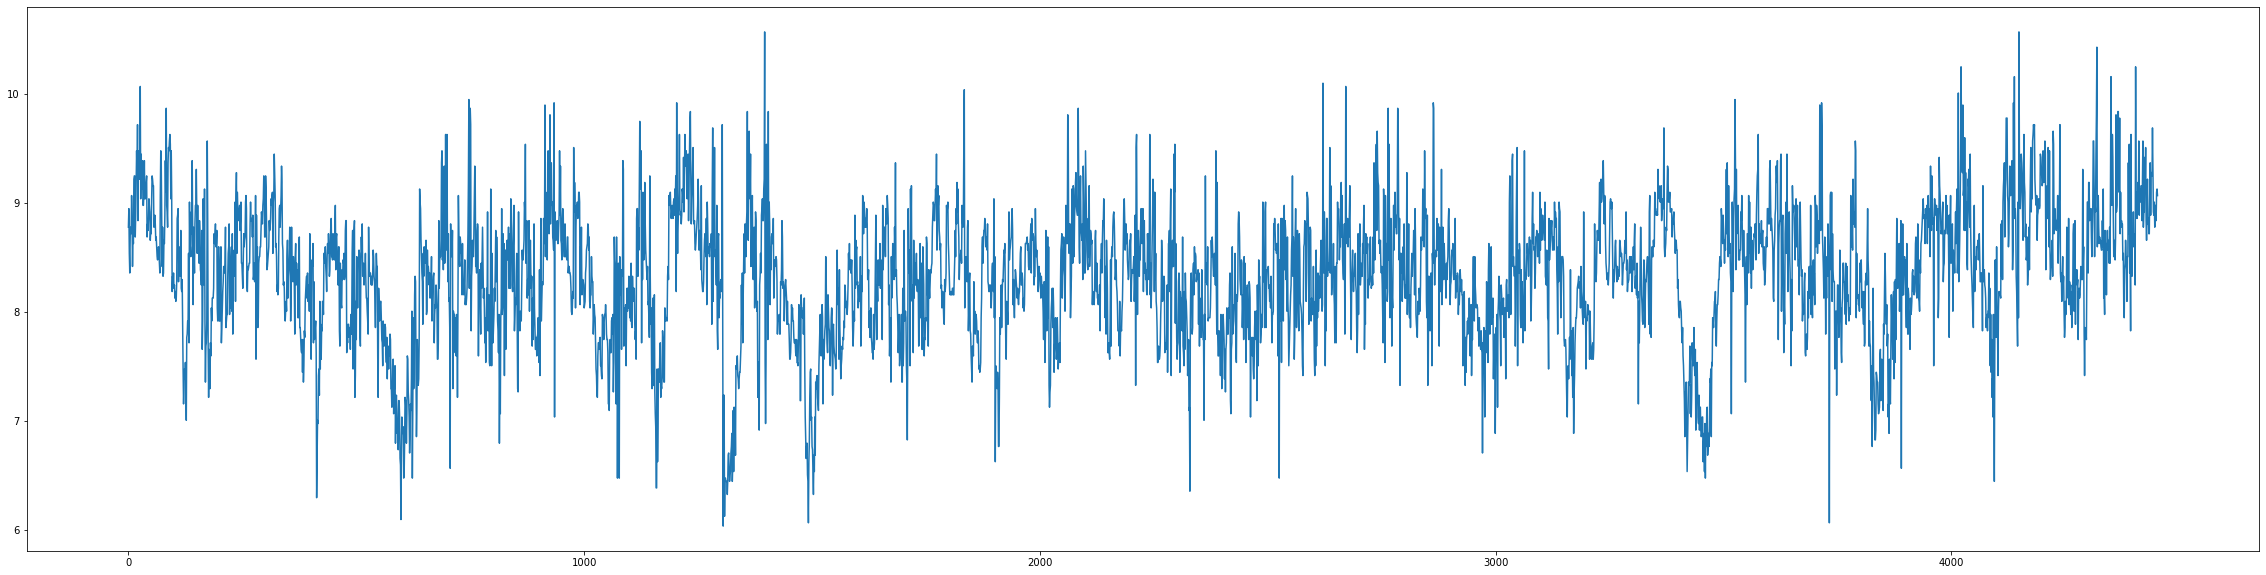

In [91]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (40,10))
plt.plot(mylist)

In [79]:
x = [i for i in range(len(mylist))]

/var/folders/pm/804wbvdx4lz30mqcr3mys38r0000gn/T/ipykernel_12733/3074193796.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(y_lowess[:, 0], y_lowess[:, 1], 'b',color='r')


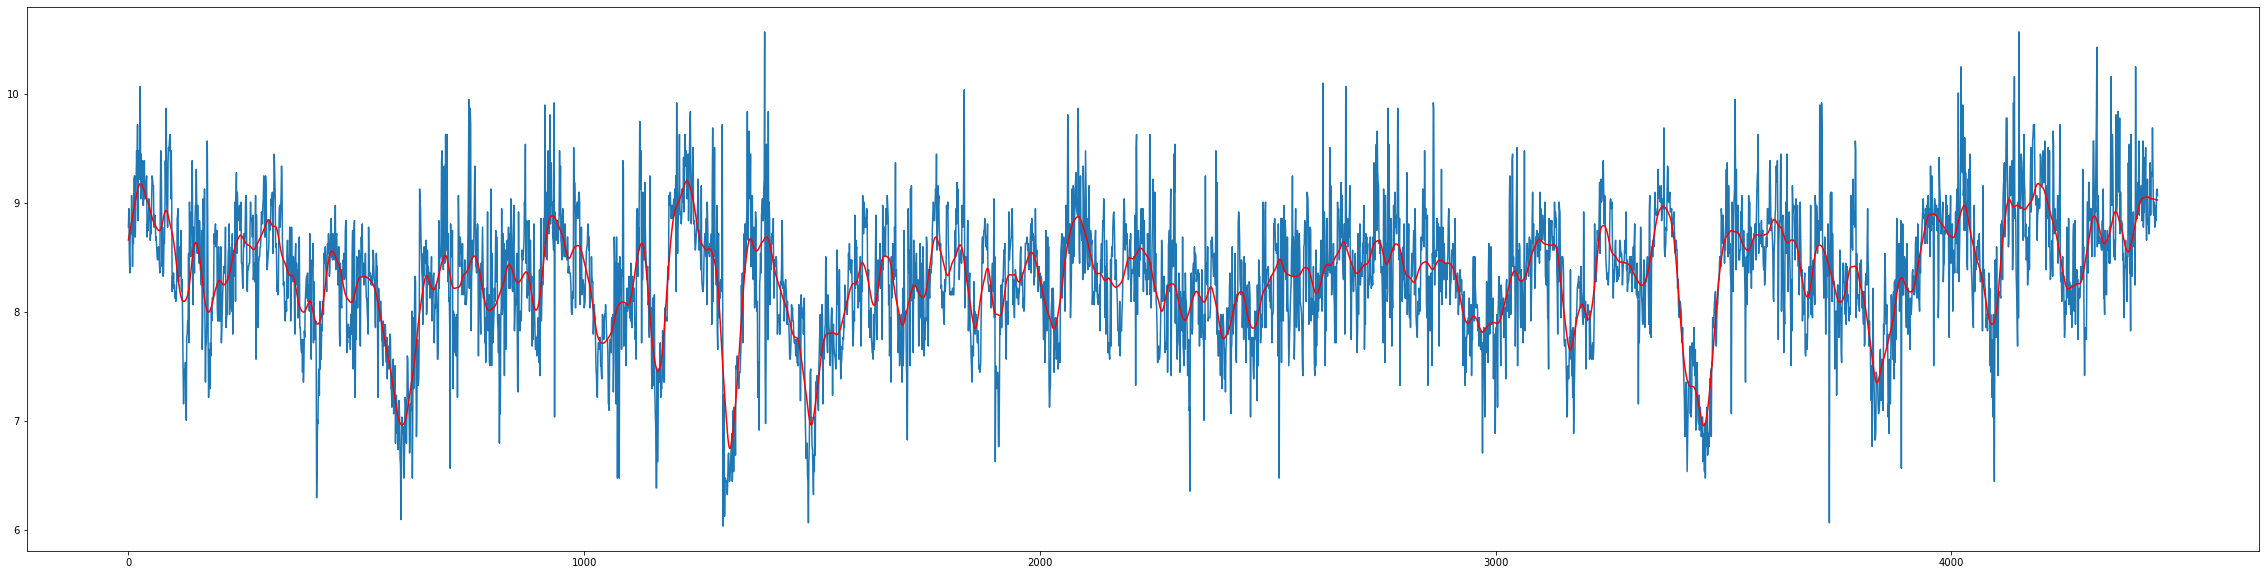

In [111]:
from turtle import color
import statsmodels.api as sm

y_lowess = sm.nonparametric.lowess(mylist,x , frac = 0.01)  # 30 % lowess smoothing
fig = plt.figure(figsize = (40,10))
plt.plot(mylist)
plt.plot(y_lowess[:, 0], y_lowess[:, 1], 'b',color='r')
  # some noise removed
plt.show()

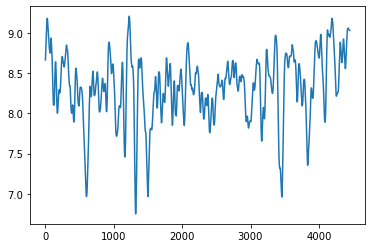

In [110]:
plt.plot(y_lowess[:, 1])

In [119]:
len(y_lowess[:, 0])


4453

In [84]:
from statsmodels.nonparametric.smoothers_lowess import lowess
filtered = lowess(mylist, x, frac=0.05)

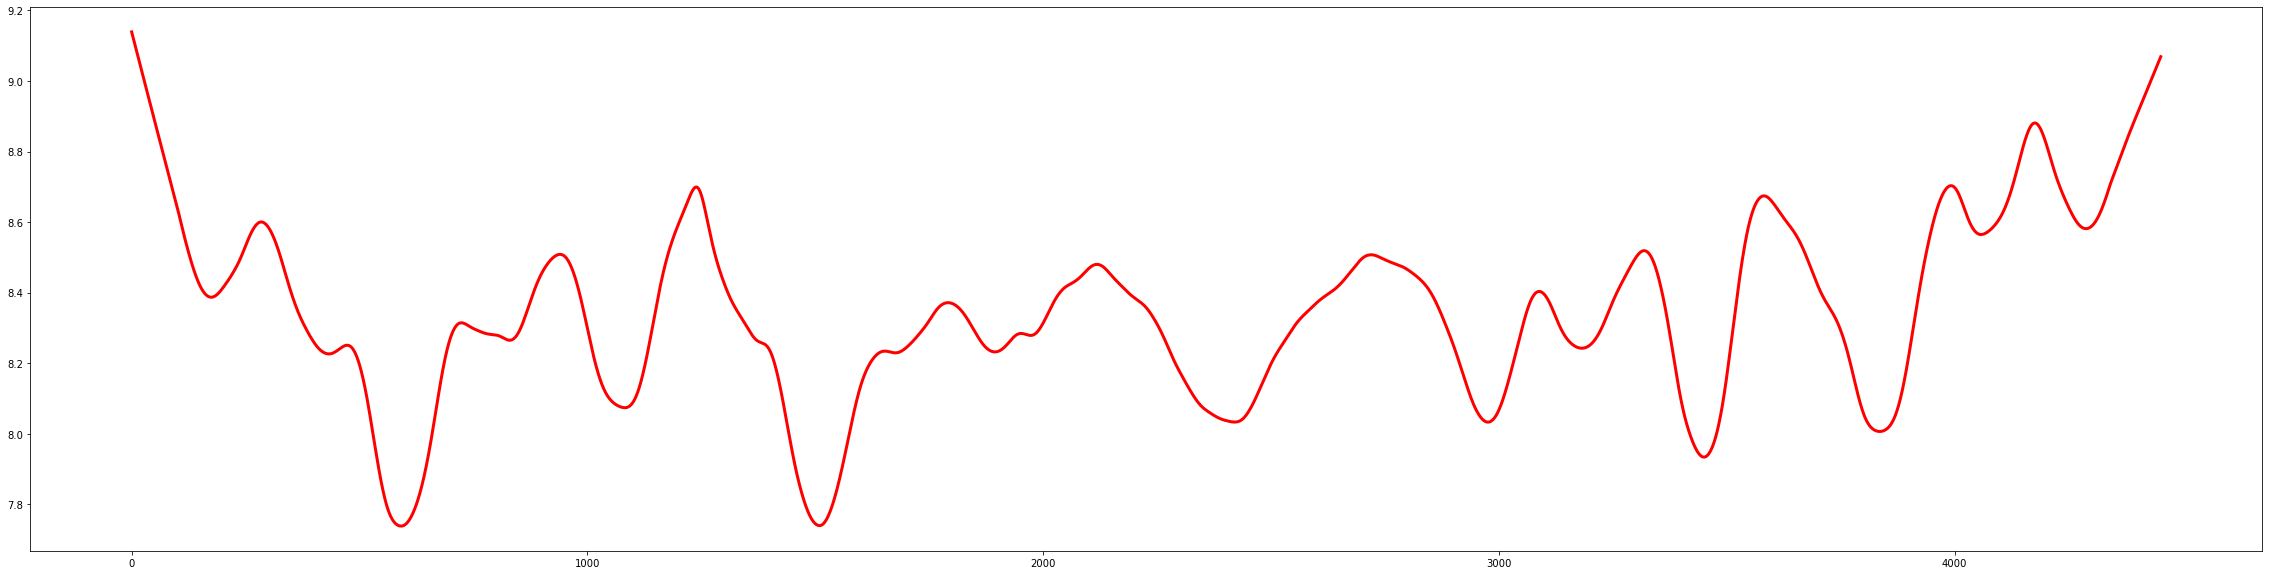

In [88]:
fig = plt.figure(figsize = (40,10))
plt.plot(filtered[:, 0], filtered[:, 1], 'r-', linewidth=3)



In [116]:
y_lowess = sm.nonparametric.lowess(mylist,x , frac = 0.01)

In [2]:
data = pd.read_excel('result-0.75-6.5-2-squar.xlsx')

In [247]:
subset = data.iloc[100:101,:]

In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace = True)

In [254]:
subset.dropna(axis=1, inplace=True)

In [252]:
subset = subset.apply(pd.to_numeric,errors='coerce')

In [253]:
subset.isna().any(axis=1)

100    True
dtype: bool

In [240]:
subset.dropna(axis = 1, inplace = True)

In [257]:
type(subset)

pandas.core.frame.DataFrame

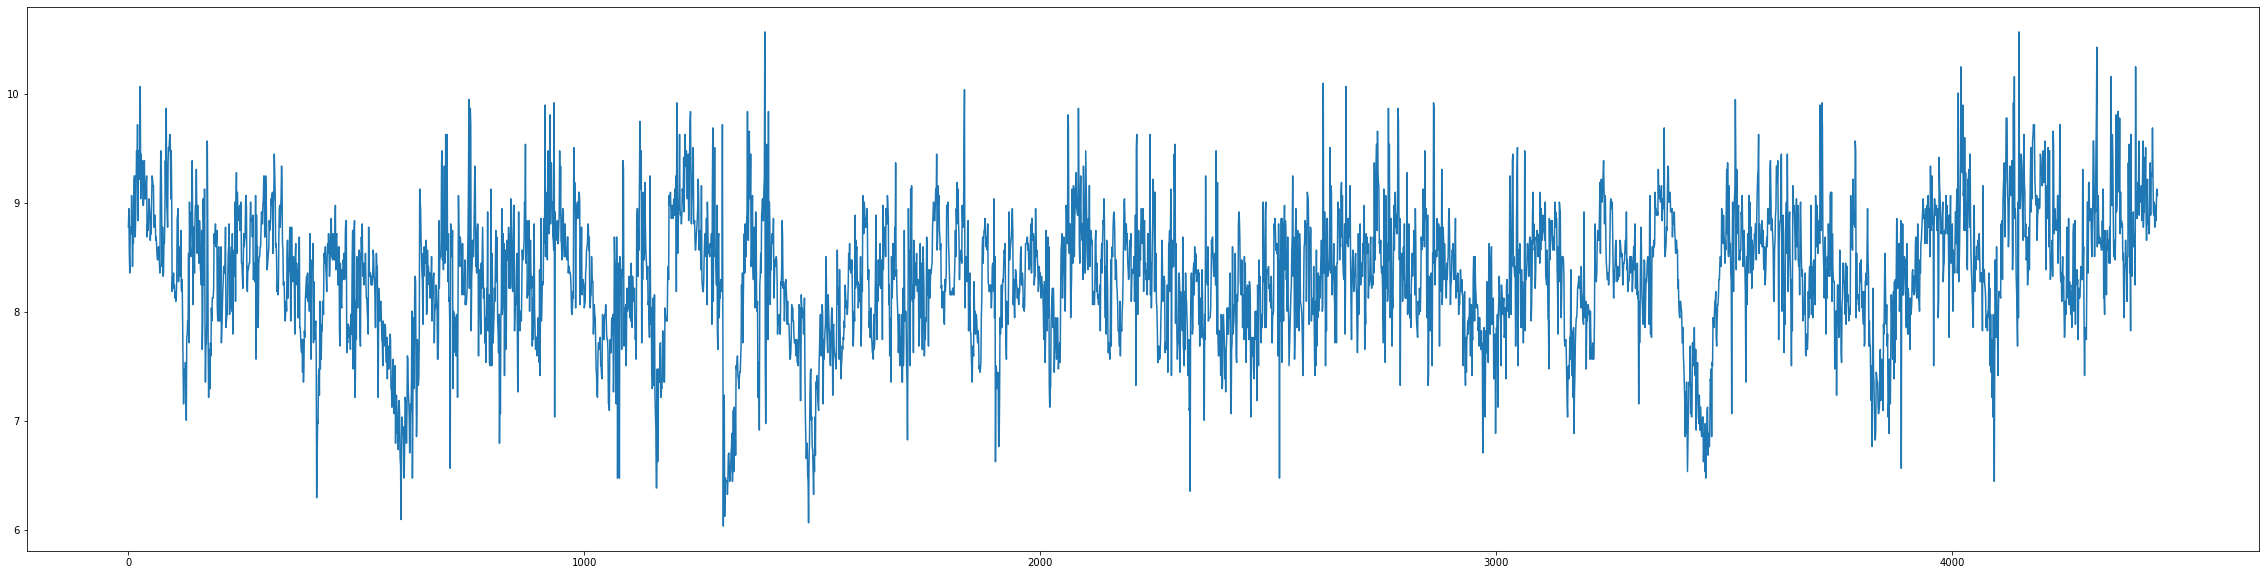

In [276]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (40,10))
x = [i for i in range(len(subset.iloc[0]))]
plt.plot(x,subset.iloc[0])

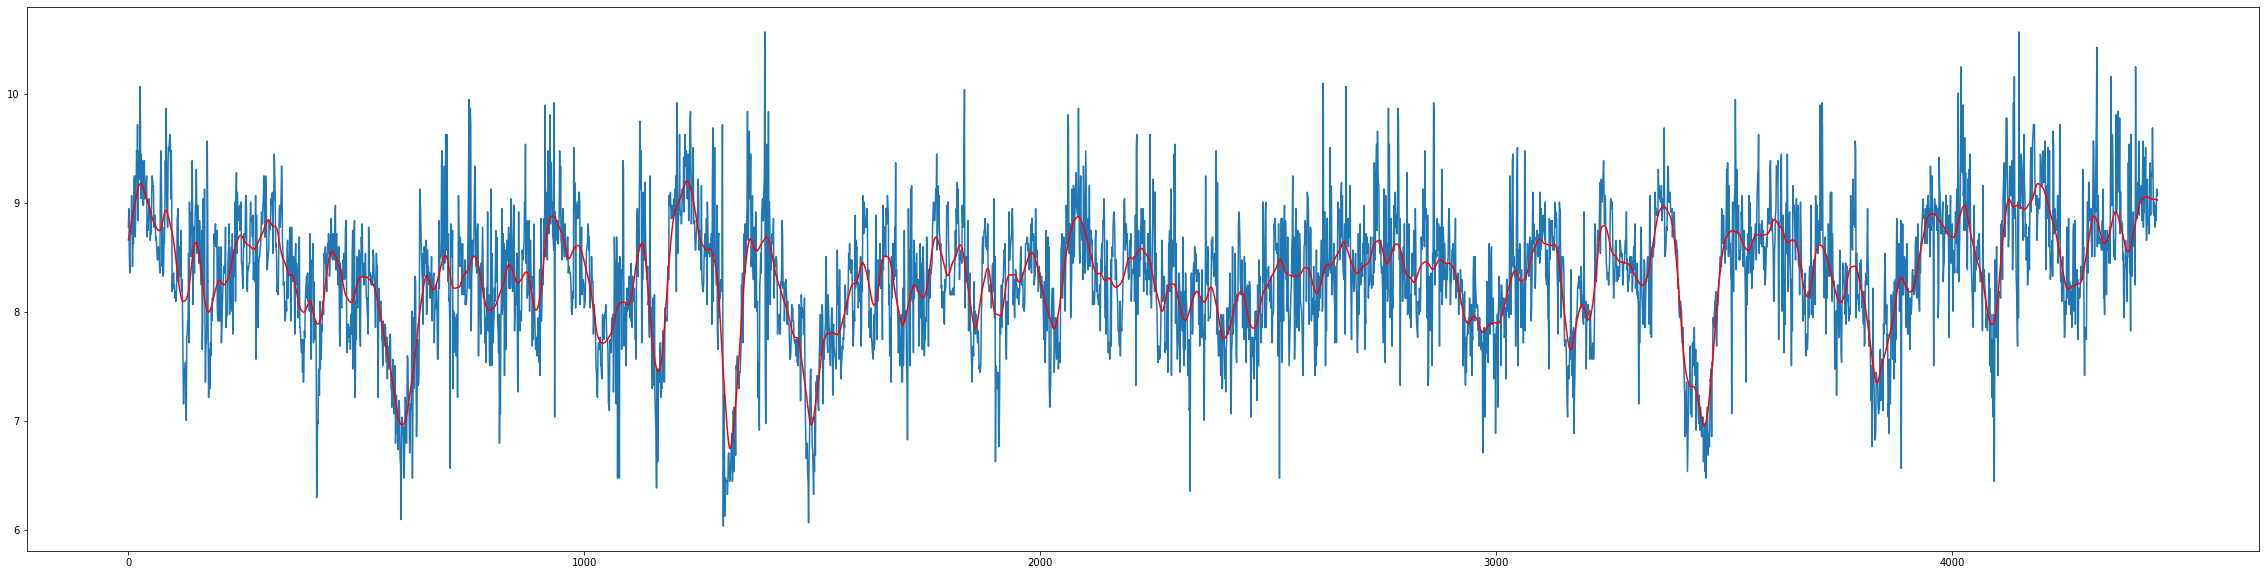

In [284]:
from turtle import color
import statsmodels.api as sm

x = [i for i in range(len(subset.iloc[0]))]
y_lowess = sm.nonparametric.lowess(subset.iloc[0],x , frac = 0.01)  # 30 % lowess smoothing
fig = plt.figure(figsize = (40,10))
plt.plot(x,subset.iloc[0])
plt.plot(x, y_lowess[:, 1], 'b',color='r')
  # some noise removed
plt.show()

In [285]:
avg_data=y_lowess[:, 1]

In [287]:
len(avg_data)

4452

In [8]:
# data = pd.read_excel('result-0.75-6.5-2-squar.xlsx')
data.drop(['Unnamed: 0'],axis=1,inplace = True)

In [304]:
row_data = data.iloc[100].apply(pd.to_numeric,errors='coerce')

In [309]:
row_data.dropna(inplace=True)

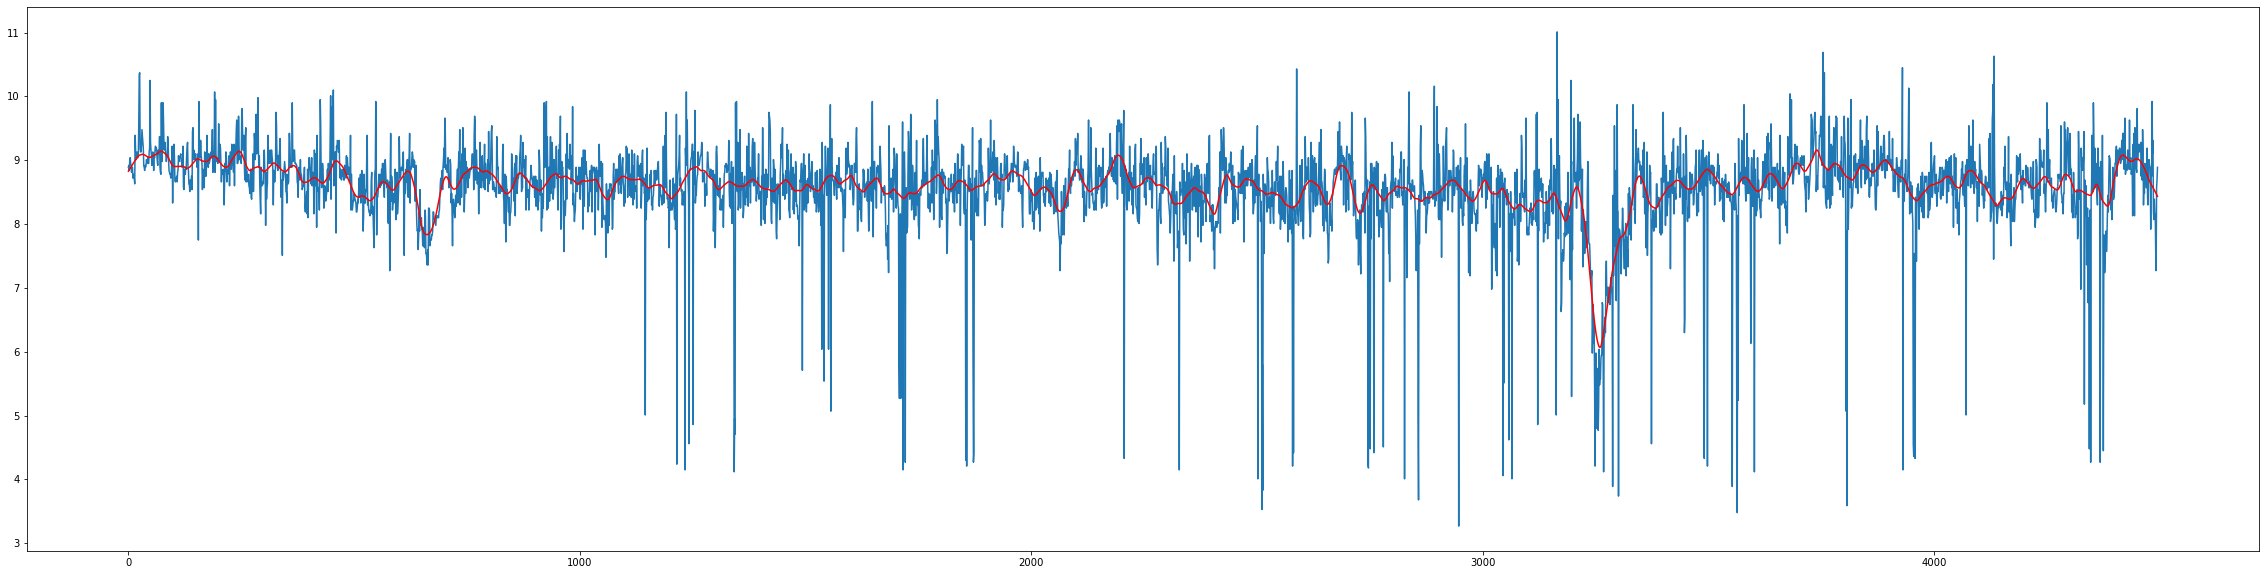

In [56]:
# for index,row in data.iterrows():
row_data = data.iloc[0].apply(pd.to_numeric,errors='coerce')
row_data.dropna(inplace=True)

x = [i for i in range(len(row_data))]
y_lowess = sm.nonparametric.lowess(row_data,x , frac = 0.01)
fig = plt.figure(figsize = (40,10))
plt.plot(x,row_data)
plt.plot(x, y_lowess[:, 1], 'b',color='r')
  # some noise removed
plt.show()



In [356]:
df = pd.DataFrame()

In [357]:
result = pd.DataFrame(y_lowess[:, 1]).T

In [360]:
df = pd.concat([df, result2], axis=0)

In [361]:
df

,0,1,2,3,4,5,6,7,8,9,...,4439,4440,4441,4442,4443,4444,4445,4446,4447,4448
0,8.876596,8.873718,8.871278,8.869318,8.867885,8.867012,8.866712,8.866972,8.867757,8.869026,...,8.989282,8.978396,8.967237,8.955768,8.943961,8.931797,8.919265,8.906361,8.893087,8.879446
0,8.876596,8.873718,8.871278,8.869318,8.867885,8.867012,8.866712,8.866972,8.867757,8.869026,...,8.989282,8.978396,8.967237,8.955768,8.943961,8.931797,8.919265,8.906361,8.893087,8.879446


In [343]:
result2 = pd.DataFrame(y_lowess[:, 1]).T

In [330]:
result2.T

,0,1,2,3,4,5,6,7,8,9,...,4439,4440,4441,4442,4443,4444,4445,4446,4447,4448
0,8.876596,8.873718,8.871278,8.869318,8.867885,8.867012,8.866712,8.866972,8.867757,8.869026,...,8.989282,8.978396,8.967237,8.955768,8.943961,8.931797,8.919265,8.906361,8.893087,8.879446


In [335]:
df = pd.concat([result1.T, result2.T], axis=0)

In [336]:
df

,0,1,2,3,4,5,6,7,8,9,...,4442,4443,4444,4445,4446,4447,4448,4449,4450,4451
0,8.662801,8.687887,8.712821,8.737564,8.762079,8.786343,8.810336,8.834037,8.857429,8.880487,...,9.036530,9.035937,9.035330,9.034679,9.033959,9.033158,9.032275,9.031313,9.030282,9.029193
0,8.876596,8.873718,8.871278,8.869318,8.867885,8.867012,8.866712,8.866972,8.867757,8.869026,...,8.955768,8.943961,8.931797,8.919265,8.906361,8.893087,8.879446,NaN,NaN,NaN


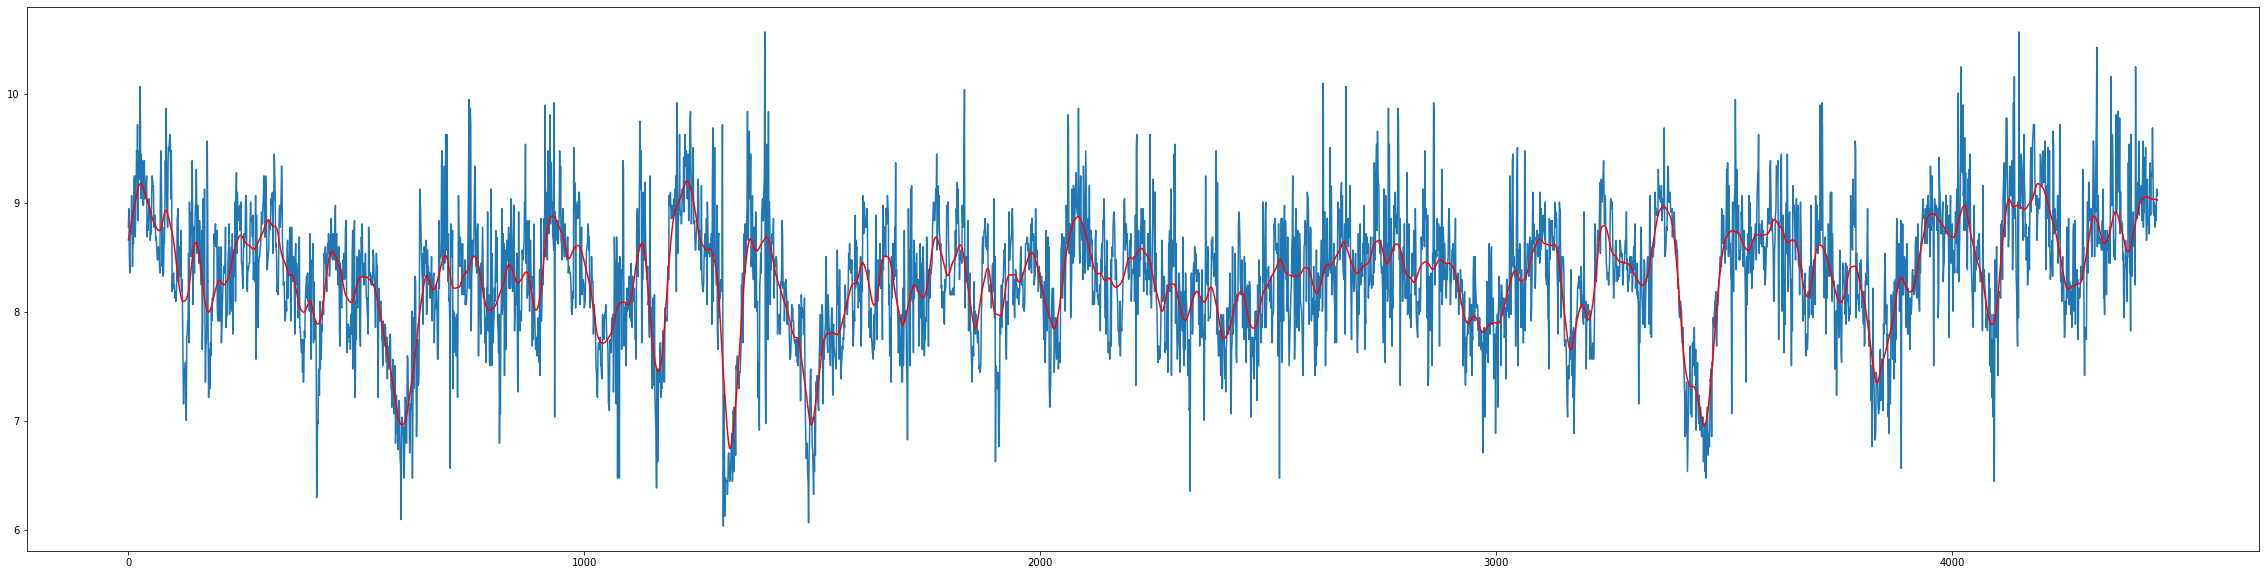

In [312]:
from turtle import color
import statsmodels.api as sm

x = [i for i in range(len(subset.iloc[0]))]
y_lowess = sm.nonparametric.lowess(subset.iloc[0],x , frac = 0.01)  # 30 % lowess smoothing
fig = plt.figure(figsize = (40,10))
plt.plot(x,subset.iloc[0])
plt.plot(x, y_lowess[:, 1], 'b',color='r')
  # some noise removed
plt.show()

In [2]:
raw_data = pd.read_excel('result-0.75-6.5-2-squar.xlsx')
raw_data.drop(['Unnamed: 0'],axis=1,inplace = True)

In [73]:
data = data.apply(pd.to_numeric,errors='coerce')
# data.dropna(inplace=True,axis = 1)

In [7]:
df = pd.DataFrame()
for index,row in data.iterrows():
    # row_data = data.iloc[index].apply(pd.to_numeric,errors='coerce')
    # row_data.dropna(inplace=True)

    row_data = data.iloc[index]
    x = [i for i in range(len(row_data))]
    y_lowess = sm.nonparametric.lowess(row_data,x , frac = 0.01)
    result = pd.DataFrame(y_lowess[:, 1]).T
    df = pd.concat([df, result], axis=0)
df.reset_index(drop=True,inplace = True)   

In [70]:
df.to_excel('avg-.75-6.5-2.xlsx', engine='xlsxwriter')

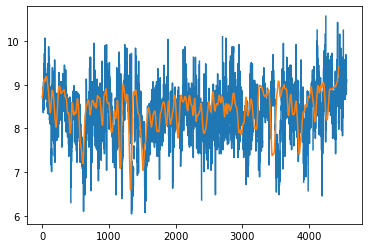

In [74]:
test1 = data.iloc[100:101]
test2 = df.iloc[105:106]
import matplotlib.pylab as plt
x1= [i for i in range(len(test1.iloc[0]))]
x2 = [i for i in range(len(test2.iloc[0]))]

plt.plot(x1,test1.iloc[0])
plt.plot(x2,test2.iloc[0])

In [97]:
data = pd.read_excel('result-0.65-6-2-squar.xlsx')

In [98]:
df = data.drop(['Unnamed: 0'],axis=1)

In [99]:
df.replace(to_replace = 'Noise', value = 100, inplace=True) 

In [102]:
data = pd.read_excel('data.xlsx')

In [109]:

df = df.apply(pd.to_numeric,errors='coerce')

In [110]:
df = data.drop(['Unnamed: 0'],axis=1)
df = df.apply(pd.to_numeric,errors='coerce')

In [ ]:
#final_data = df.copy()

thresh_list = [0.75]
noise_thresh_list = [6.5]

for noise_thresh in noise_thresh_list:
    for thresh in thresh_list:
        for col in range(1,len(df.columns) - 1):
            x = final_data[col].values
            x_after = final_data[col+1].values
            x_before = final_data[col-1].values
            result = [row for row in range(1,len(x) -1) if (x[row]<= noise_thresh and x[row] > 0) and ((x[row]<thresh*x[row-1]) or (x[row]<thresh*x[row+1]) or (x[row]<thresh* x_after[row]) or (x[row]<thresh* x_before[row])) ]
            print(col,'=',result)

            for row in result:
                final_data.iloc[row,col] = 100

        #final_data[col].replace(to_replace = 0, value = None, inplace=True)   
        
        # final_data = final_data.replace(0,100)
        # file_name = f'result-{thresh}-{noise_thresh}-squar.xlsx'
        # final_data.to_excel(file_name, engine='xlsxwriter')

In [122]:
final_data = final_data.replace(100,'Noise')

In [124]:
file_name = f'result-{thresh}-{noise_thresh}-3-squar.xlsx'
final_data.to_excel(file_name, engine='xlsxwriter')

In [172]:
directory = os.getcwd()
entries = os.listdir(directory)
os.chdir(directory)
for file in glob.glob("*-squar.xlsx"):
    print(file)

result-0.65-6-squar.xlsx
result-0.65-6.5-squar.xlsx
result-0.65-6-2-squar.xlsx
result-0.75-6.5-2-squar.xlsx
result-0.75-6-2-squar.xlsx
result-0.75-6.5-squar.xlsx
result-0.65-6.5-2-squar.xlsx
result-0.75-6-squar.xlsx


In [139]:
data = pd.read_excel('result-0.65-6.5-squar.xlsx')

In [141]:
data = data.replace('Noise',100)

In [32]:
files = []
for file in glob.glob("*filtered.csv"):
    files.append(file)
    print(file)
    # tokenize = file.split("-")
    # noise_thresh = float(tokenize[1])
    # print(noise_thresh)
    # data = pd.read_excel(file)

filtered.csv


In [33]:
for file in files:
    tokenize = file.split("-")
    noise_thresh = float(tokenize[1])
    print(noise_thresh)
    #data = pd.read_excel(file)
    #df = data.replace('Noise',100)
    


IndexError: list index out of range

In [ ]:
for name in files: 

    data = pd.read_excel(name)
    df = data.replace('Noise',100)
    df = df.drop(['Unnamed: 0'],axis=1)
    df = df.apply(pd.to_numeric,errors='coerce')


    tokenize = file.split("-")

    noise_thresh = float(tokenize[2])
    thresh = float(tokenize[1])
    print(noise_thresh)
    print(thresh)


    final_data = df.copy()

    for col in range(1,len(df.columns) - 1):
        x = df[col].values
        x_after = df[col+1].values
        x_before = df[col-1].values
        result = [row for row in range(1,len(x) -1) if (x[row]<= noise_thresh and x[row] > 0) and ((x[row]<thresh*x[row-1]) and (x[row]<thresh*x[row+1]) and (x[row]<thresh* x_after[row]) and (x[row]<thresh* x_before[row])) ]
        print(col,'=',result)

        for row in result:
            final_data.iloc[row,col] = 100


    final_data = final_data.replace(100,'Noise')
    file_name = f'finale-and-{name}'
    final_data.to_excel(file_name, engine='xlsxwriter')

In [129]:





files = []
for file in glob.glob("*filtered.csv"):
    files.append(file)
    print(file)

filtered.csv
